## Exercise 07 : Heatmap

* analyze only the users and not the admins
* you can choose the color palette that you like for both of the graphs that you will
need to draw in this exercise
* use the table checker for your query
* use absolute values of the commits, not the averages
* sort the dataframes by the total number of commits made by a user

In [ ]:
import pandas as pd 
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

con=sqlite3.connect("data/checking-logs.sqlite")
main_query="""
SELECT
    c.uid,
    strftime('%w', c.timestamp) AS week_day,
    CAST(strftime('%H', c.timestamp) AS INTEGER) as day_hour
FROM checker c
    WHERE c.uid LIKE "user_%" 
"""
df=pd.read_sql(main_query, con)
days=['Sun', 'Mon','Tue','Wed', 'Thu', 'Fri','Sat']
day_order=['Sat','Fri','Thu', 'Wed','Tue','Mon','Sun']
df['week_day']=df['week_day'].astype(int).map(lambda x: days[x])
week_table=df.groupby(['week_day','uid']).size().unstack(fill_value=0)
hour_table=df.groupby(['day_hour','uid']).size().unstack(fill_value=0)
sorted_users=df['uid'].value_counts().sort_values(ascending=False).index

week_table=week_table.reindex(columns=sorted_users, fill_value=0)
hour_table=hour_table.reindex(columns=sorted_users, fill_value=0)
week_table=week_table.reindex(index=day_order)

In [75]:
#week_table
hour_table

uid,user_4,user_14,user_2,user_25,user_19,user_26,user_20,user_31,user_10,user_3,...,user_17,user_16,user_27,user_15,user_6,user_22,user_7,user_11,user_23,user_0
day_hour,,,,,,,,,,,,,,,,,,,,,
0,0,4,0,0,0,4,0,2,0,0,...,0,0,0,0,2,0,0,0,0,0
1,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,13,0,2,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,3,6,0,0,10,2,0,3,0,...,1,0,0,0,0,0,0,0,0,0
8,0,6,0,0,0,5,2,0,9,6,...,2,0,0,0,0,0,1,0,1,0
9,0,4,13,0,0,3,0,1,0,3,...,0,0,0,2,0,3,0,0,0,0
10,26,2,42,18,20,16,0,0,0,2,...,7,0,0,0,0,0,0,0,0,0


* you can choose the color palette that you like for both of the graphs that you will
need to draw in this exercise

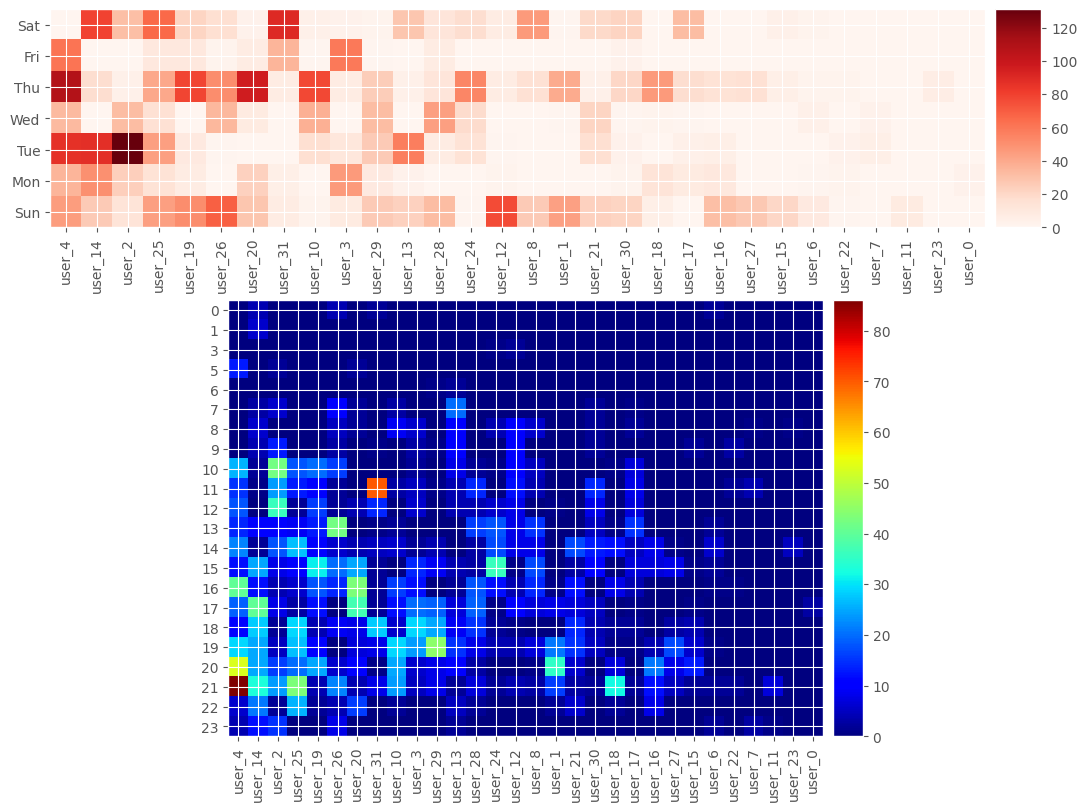

In [76]:

fig, axes=plt.subplots(
    figsize=(15,8),
    nrows=2,
    ncols=1,
    gridspec_kw={'height_ratios': [1, 2]}, 
    constrained_layout=True
)
plot_week=axes[0].imshow(
    week_table,
    cmap='Reds'
)
axes[0].set_xticks(range(len(week_table.columns)))
axes[0].set_xticklabels(week_table.columns, rotation=90)
axes[0].set_yticks(range(len(week_table.index)))
axes[0].set_yticklabels(week_table.index)

plot_hours=axes[1].imshow(
    hour_table,
    cmap='jet'
)
axes[1].set_xticks(range(len(hour_table.columns)))
axes[1].set_xticklabels(hour_table.columns, rotation=90)
axes[1].set_yticks(range(len(hour_table.index)))
axes[1].set_yticklabels(hour_table.index)

plt.colorbar(plot_week,cax=make_axes_locatable(axes[0]).append_axes('right', size='5%', pad=0.1))
plt.colorbar(plot_hours,cax=make_axes_locatable(axes[1]).append_axes('right', size='5%', pad=0.1))


In [ ]:
con.close()

*  “Which user has the most commits on Tue?” The answer: user_*.

user_2 
  
* “Which user has the most commits on Thu?” The answer: user_*. 

user_4
  
* “On which weekday do the users not like making a lot of commits?” The
answer, for example: 

Fri

* “Which user at which hour made the largest number of commits?” The answer,

user_4, 21